In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel('/kaggle/input/databert/nhsdatanew.xlsx',sheet_name='Sheet3')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diseases  15042 non-null  object
 1   Sym_1     15042 non-null  object
 2   Sym_2     15042 non-null  object
 3   Sym_3     15042 non-null  object
 4   Sym_5     15042 non-null  object
 5   Sym_6     13312 non-null  object
 6   Sym_7     15042 non-null  object
 7   Directed  15042 non-null  object
dtypes: object(8)
memory usage: 940.2+ KB


In [4]:
#df=pd.read_excel('dataset-19.xlsx',sheet_name='Datanew')
df.shape[1]

8

In [5]:
X=df.drop(columns=['Directed'])
y=df['Directed']
df

,Diseases,Sym_1,Sym_2,Sym_3,Sym_5,Sym_6,Sym_7,Directed
0,Book a gp appointment or get health advice,finger pain,less than 24 hours,no,none,none,doing regular activities,pharmacy
1,Book a gp appointment or get health advice,finger pain,longer than 24 hours,no,none,none,doing regular activities,pharmacy
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,no,none,none,doing regular activities,pharmacy
3,Book a gp appointment or get health advice,finger pain,less than 24 hours,paracetamol,none,none,doing regular activities,pharmacy
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hours,paracetamol,none,none,doing regular activities,physio
...,...,...,...,...,...,...,...,...
15037,Need help with mental health,head ache,longer than 24 hours,any other mood stabilisers,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health
15038,Need help with mental health,head ache,long term or intermittent,any other mood stabilisers,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health
15039,Need help with mental health,head ache,less than 24 hours,benzodiazepines,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health
15040,Need help with mental health,head ache,longer than 24 hours,benzodiazepines,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health


<AxesSubplot:>

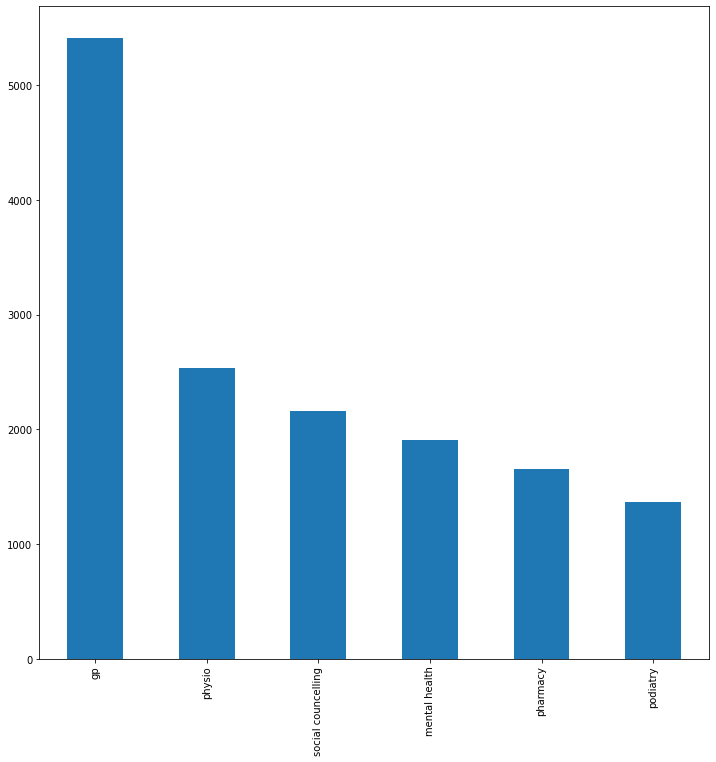

In [6]:
plt.figure(figsize=(12,12))
df.Directed.value_counts().plot(kind='bar')

In [7]:
#Renaming col names
list1=[i for i in range(df.shape[1])]
new_Index=[str(i) for i in list1]
df.columns=new_Index
df.head()


,0,1,2,3,4,5,6,7
0,Book a gp appointment or get health advice,finger pain,less than 24 hours,no,none,none,doing regular activities,pharmacy
1,Book a gp appointment or get health advice,finger pain,longer than 24 hours,no,none,none,doing regular activities,pharmacy
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,no,none,none,doing regular activities,pharmacy
3,Book a gp appointment or get health advice,finger pain,less than 24 hours,paracetamol,none,none,doing regular activities,pharmacy
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hours,paracetamol,none,none,doing regular activities,physio


In [9]:
leng=df.shape[1]
df['Symptoms']=''
symp=[]
for i in range(len(df)) :
    symp.append(' '.join(str(x) for x in df.iloc[i,0:4]))
    
for i in range(len(df)):
    df['Symptoms'][i]=symp[i]
df

,0,1,2,3,4,5,6,7,Symptoms
0,Book a gp appointment or get health advice,finger pain,less than 24 hours,no,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
1,Book a gp appointment or get health advice,finger pain,longer than 24 hours,no,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,no,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
3,Book a gp appointment or get health advice,finger pain,less than 24 hours,paracetamol,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hours,paracetamol,none,none,doing regular activities,physio,Book a gp appointment or get health advice wri...
...,...,...,...,...,...,...,...,...,...
15037,Need help with mental health,head ache,longer than 24 hours,any other mood stabilisers,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health,Need help with mental health head ache longer ...
15038,Need help with mental health,head ache,long term or intermittent,any other mood stabilisers,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health,Need help with mental health head ache long te...
15039,Need help with mental health,head ache,less than 24 hours,benzodiazepines,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health,Need help with mental health head ache less th...
15040,Need help with mental health,head ache,longer than 24 hours,benzodiazepines,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health,Need help with mental health head ache longer ...


In [12]:
df=df[[f'{leng-2}','Symptoms']].copy()
df.head()
#df.iloc[0]
df.Symptoms[0]

'Book a gp appointment or get health advice finger pain less than 24 hours no'

In [15]:
data=df.rename({f'{leng-2}':'Department','Symptoms':'Symptoms'},axis=1)
data

,Department,Symptoms
0,pharmacy,Book a gp appointment or get health advice fin...
1,pharmacy,Book a gp appointment or get health advice fin...
2,pharmacy,Book a gp appointment or get health advice fin...
3,pharmacy,Book a gp appointment or get health advice fin...
4,physio,Book a gp appointment or get health advice wri...
...,...,...
15037,mental health,Need help with mental health head ache longer ...
15038,mental health,Need help with mental health head ache long te...
15039,mental health,Need help with mental health head ache less th...
15040,mental health,Need help with mental health head ache longer ...


<AxesSubplot:>

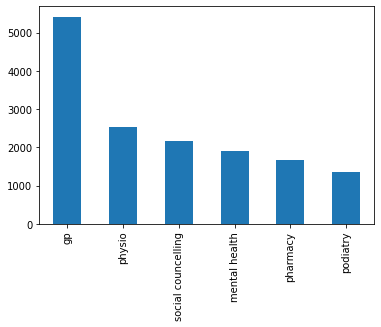

In [16]:
data.Department.value_counts().plot(kind='bar')

## Removing nan and stopwords

In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub('nan', '',text)
    text = re.sub('_', ' ',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
data['Symptoms'] = data['Symptoms'].apply(clean_text)

## Check no. of words 

In [19]:
data['Symptoms'].apply(lambda x: len(x.split(' '))).sum()
data

,Department,Symptoms
0,pharmacy,book gp appointment get health advice finger p...
1,pharmacy,book gp appointment get health advice finger p...
2,pharmacy,book gp appointment get health advice finger p...
3,pharmacy,book gp appointment get health advice finger p...
4,physio,book gp appointment get health advice wrist pa...
...,...,...
15037,mental health,need help mental health head ache longer 24 ho...
15038,mental health,need help mental health head ache long term in...
15039,mental health,need help mental health head ache less 24 hour...
15040,mental health,need help mental health head ache longer 24 ho...


In [20]:
data['Symptoms'][0]

'book gp appointment get health advice finger pain less 24 hours'

## Encoding the labels

In [21]:
possible_labels = data.Department.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'pharmacy': 0,
 'physio': 1,
 'gp': 2,
 'podiatry': 3,
 'mental health': 4,
 'social councelling': 5}

In [22]:
data['label'] = data.Department.replace(label_dict)
data

,Department,Symptoms,label
0,pharmacy,book gp appointment get health advice finger p...,0
1,pharmacy,book gp appointment get health advice finger p...,0
2,pharmacy,book gp appointment get health advice finger p...,0
3,pharmacy,book gp appointment get health advice finger p...,0
4,physio,book gp appointment get health advice wrist pa...,1
...,...,...,...
15037,mental health,need help mental health head ache longer 24 ho...,4
15038,mental health,need help mental health head ache long term in...,4
15039,mental health,need help mental health head ache less 24 hour...,4
15040,mental health,need help mental health head ache longer 24 ho...,4


## Perform train test split 

In [23]:
# X=data.Symptoms
# y=data.Department
# abc=data.index.values
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(data.index.values, 
#                                                   data.label.values, 
#                                                   test_size=0.15, 
#                                                   random_state=42, 
#                                                   stratify=data.label.values)

# data['data_type'] = ['not_set']*data.shape[0]

# data.loc[X_train, 'data_type'] = 'train'
# data.loc[X_val, 'data_type'] = 'val'

# data.groupby(['Department', 'label', 'data_type']).count()

In [24]:
#abc

In [25]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
#import tensorflow_text as text

## Transform to vector using bert

In [26]:
import numpy as np
seq_len=512
num_samples=len(data)

Xids=np.zeros((num_samples,seq_len))
Xmask=np.zeros((num_samples,seq_len))

Xids.shape

(15042, 512)

In [27]:
from transformers import BertTokenizer

In [28]:
tokenizer= BertTokenizer.from_pretrained('bert-base-cased')

for i,phrase in enumerate(data['Symptoms']):
    tokens=tokenizer.encode_plus(phrase,max_length=seq_len,truncation=True,
                                padding='max_length',add_special_tokens=True,
                                return_tensors='tf')
    Xids[i,:]=tokens['input_ids']
    Xmask[i,:]=tokens['attention_mask']

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

2022-09-17 09:01:31.952610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 09:01:32.056136: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 09:01:32.056971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 09:01:32.060222: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [29]:
Xids#

array([[ 101., 1520.,  176., ...,    0.,    0.,    0.],
       [ 101., 1520.,  176., ...,    0.,    0.,    0.],
       [ 101., 1520.,  176., ...,    0.,    0.,    0.],
       ...,
       [ 101., 1444., 1494., ...,    0.,    0.,    0.],
       [ 101., 1444., 1494., ...,    0.,    0.,    0.],
       [ 101., 1444., 1494., ...,    0.,    0.,    0.]])

In [30]:
Xmask#control for the attention layer within bert

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [31]:
#one hot encoding dept labels 
dept_labels = data['label'].values
dept_labels

array([0, 0, 0, ..., 4, 4, 4])

In [32]:
labels = np.zeros((num_samples,dept_labels.max()+1))
labels.shape

(15042, 6)

In [33]:
labels[np.arange(num_samples),dept_labels]=1

In [34]:
labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

## Changing format into format for bert i/p


In [35]:
dataset= tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))
dataset.take(1)

<TakeDataset shapes: ((512,), (512,), (6,)), types: (tf.float64, tf.float64, tf.float64)>

## Merging Xids and Xmask (i/p tensors) into a single dictionary(tf expects i/p with index 0 as i/p and index 1 as target 

In [36]:
def map_func(input_ids,masks,labels):
    return {'input_ids':input_ids,'attention_mask':masks},labels

In [37]:
dataset=dataset.map(map_func)

In [38]:
dataset

<MapDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, (6,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [39]:
batch_size=8

dataset=dataset.shuffle(10000).batch(batch_size,drop_remainder=True)

dataset.take(1)

<TakeDataset shapes: ({input_ids: (8, 512), attention_mask: (8, 512)}, (8, 6)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [40]:
split=0.8
size=int((Xids.shape[0]/batch_size)*split)

In [41]:
train_ds=dataset.take(size)
val_ds=dataset.skip(size)

#del dataset

In [42]:
from transformers import TFAutoModel

bert=TFAutoModel.from_pretrained('bert-base-cased')

bert

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [43]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [44]:
import tensorflow as tf

In [45]:
input_ids=tf.keras.layers.Input(shape=(seq_len),name='input_ids',dtype='int32')
mask=tf.keras.layers.Input(shape=(seq_len),name='attention_mask',dtype='int32')

embeddings=bert.bert(input_ids,attention_mask=mask)[1]

x=tf.keras.layers.Dense(1024,activation='relu')(embeddings)
y=tf.keras.layers.Dense(dept_labels.max()+1,activation='softmax',name='outputs')(x)

In [46]:
model=tf.keras.Model(inputs=[input_ids,mask],outputs=y)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         787456      bert[0][1]                   

In [47]:
optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5,decay=1e-6)
loss=tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [48]:
model.compile(optimizer=optimizer,loss=loss,metrics=[acc])

In [49]:
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=3)

Epoch 1/3


2022-09-17 09:02:57.376395: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1504/1504 [==============================] - 903s 594ms/step - loss: 0.6697 - accuracy: 0.7325 - val_loss: 0.5037 - val_accuracy: 0.8039
Epoch 2/3
1504/1504 [==============================] - 892s 593ms/step - loss: 0.5124 - accuracy: 0.7893 - val_loss: 0.4892 - val_accuracy: 0.7955
Epoch 3/3
1504/1504 [==============================] - 907s 603ms/step - loss: 0.4965 - accuracy: 0.7945 - val_loss: 0.4842 - val_accuracy: 0.8029


In [50]:
#y_test=val_ds['labels']
val_ds

<SkipDataset shapes: ({input_ids: (8, 512), attention_mask: (8, 512)}, (8, 6)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [51]:
import tensorflow as tf

@tf.keras.utils.register_keras_serializable()
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self, k, **kwargs):
        self.k = k
        super(CustomLayer, self).__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config["k"] = self.k
        return config

    def call(self, input):
        return tf.multiply(input, 2)

In [56]:
model.save('smallbert.h5')

In [53]:
#model.save('Sheet3_bert.h5')

In [54]:
#tf.keras.models.save_model(model,'Bert_nhs_sheet1.h5')

In [55]:
# Check if model is working 
model=tf.keras.models.load_model('Sheet3_bert')
model.summary()

OSError: SavedModel file does not exist at: Sheet3_bert/{saved_model.pbtxt|saved_model.pb}

In [ ]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

def prep_data(text):
    tokens=tokenizer.encode_plus(text,max_length=512,
                                truncation=True, return_token_type_ids=False,
                                padding='max_length',add_special_tokens=True,
                                return_tensors='tf')
    return{
        'input_ids':tf.cast(tokens['input_ids'],tf.float64),
        'attention_mask':tf.cast(tokens['attention_mask'],tf.float64)
    }

In [ ]:
test=prep_data('Get help for MH head ache long term or intermittent no no can do regular activities')

In [ ]:
def get_result(val_ds):
    preds=[]
    for sym in val_ds:
        test=prep_data(sym)
        probs=model.predict(test)[0]
        preds.append(np.argmax(probs))

In [ ]:
import numpy as np
get_result(val_ds)

In [ ]:
print(keras.__version__)


In [ ]:
print(tf.__version__)